Setting the right learning rate is crucial for training deep learning models effectively. However, keeping the learning rate fixed throughout training is often not optimal.

To improve training efficiency, we use Learning Rate Schedulers, which adjust the learning rate dynamically based on training progress.

📌 Why Adjust the Learning Rate?

1️⃣ Too high → The model oscillates and never converges.

2️⃣ Too low → The model learns very slowly and gets stuck in local minima.

3️⃣ Dynamic adjustment → Helps balance speed vs. accuracy and improves convergence.

📌 Step Decay (Basic Scheduler)

Reduces the learning rate by a factor every N epochs.

Example: If LR = 0.1, we might reduce it to 0.01 after 10 epochs, then 0.001 after 20 epochs.

Simple but effective.

Step 1: Import Required Libraries

We start by importing PyTorch and the necessary modules.

In [2]:
import torch

import torch.nn as nn

import torch.optim as optim

import torch.optim.lr_scheduler as lr_scheduler

import matplotlib.pyplot as plt

Step 2: Define a Simple Model

We create a small neural network for demonstration.

In [3]:
class SimpleNN(nn.Module):

    def __init__(self):

        super(SimpleNN,self).__init__()

        self.fc = nn.Linear(2,1)   # Simple Linear Model

    def forward(self, x):

        return self.fc(x)
    
# Initialize model

model = SimpleNN()

Step 3: Define Optimizer & Scheduler

We use SGD as the optimizer.

We apply Step Decay, where we reduce LR by a factor every 10 epochs.

In [4]:
# Define optimizer

optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

# StepLR scheduler: Reduce LR by factor of 0.1 every 10 epochs

scheduler = lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

Step 4: Simulate Training and Track LR

We'll train for 30 epochs and observe how the learning rate changes.

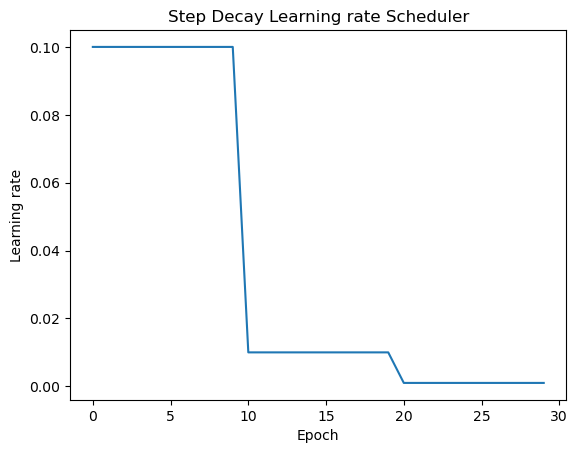

In [5]:
# Track learning rates

lrs = []


for epoch in range(30):

    optimizer.step() # Normally we would compute loss and backpropagate, but we're just tracking LR

    lrs.append(optimizer.param_groups[0]['lr']) # Current LR

    scheduler.step()  # Update LR based on step decay


# Plot LR changes

plt.plot(lrs)

plt.xlabel('Epoch')

plt.ylabel('Learning rate')

plt.title('Step Decay Learning rate Scheduler')

plt.show()

Epoch 0-9 → LR = 0.1

Epoch 10-19 → LR = 0.01

Epoch 20-30 → LR = 0.001